George Forman, Hewlett-Packard Laboratories  
These data are available from the University of California at Irvine Repository of Machine Learning Databases and Domain Theories. The address is: http://www.ics.uci.edu/~Here

## Libaries and Data

In [105]:
# Libaries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [13]:
# Data
df = pd.read_csv('spam.csv')
df.head()

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,y
1,1028,0.180,0.372,0.43,0.43,0.21,y
2,2259,0.184,0.276,0.06,1.16,0.06,y
3,191,0.000,0.137,0.00,0.00,0.00,y
4,191,0.000,0.135,0.00,0.00,0.00,y


Features:

crl.tot = total length of words in capitals  
dollar = number of occurrences of the \$ symbol  
bang = number of occurrences of the ! symbol  
money = number of occurrences of the word ‘money’  
n000 = number of occurrences of the string ‘000’  
make = number of occurrences of the word ‘make’  
yesno = outcome variable, a factor with levels n not spam, y spam

## Data Analysis

In [14]:
# Summary Statistics
# Very prone to outliers - clr.tot 75% to max is a huge variation! True for most features.
# View on outliers: Most of the time, they are a problem. E.x. if the mean of clr.tot is 95, 
# and most of them is up to 266, we don't see the need to study the outliers.
df.describe()

,crl.tot,dollar,bang,money,n000,make
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,283.289285,0.075811,0.269071,0.094269,0.101645,0.104553
std,606.347851,0.245882,0.815672,0.442636,0.350286,0.305358
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,266.000000,0.052000,0.315000,0.000000,0.000000,0.000000
max,15841.000000,6.003000,32.478000,12.500000,5.450000,4.540000


array([[<Axes: title={'center': 'crl.tot'}>,
        <Axes: title={'center': 'dollar'}>],
       [<Axes: title={'center': 'bang'}>,
        <Axes: title={'center': 'money'}>],
       [<Axes: title={'center': 'n000'}>,
        <Axes: title={'center': 'make'}>]], dtype=object)

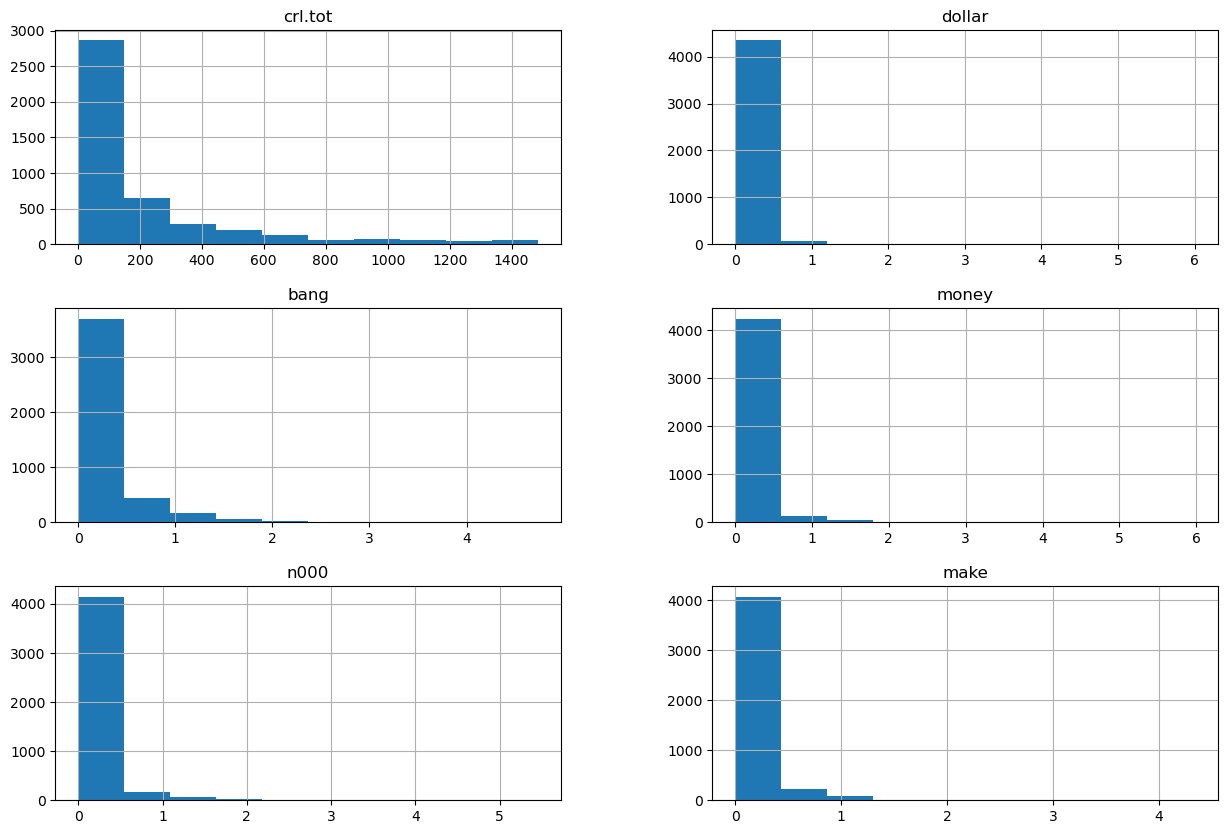

In [21]:
# Histograms
# These outliers prevent us from doing proper visualization.
df.hist(figsize=(15,10))

In [16]:
# Removing outliers:
# Iterative process
# Removing one variable that is completely wrong first, then gradually move to others.
# Looks at how many observations you start with, then how many are left (how many you are removing)
print(len(df))
df = df[df['crl.tot'] < 5000]
print(len(df))

4601
4594


In [17]:
print(len(df))
df = df[df['crl.tot'] < 1500]
print(len(df))

4594
4462


In [18]:
print(len(df))
df = df[df['bang'] < 5]
print(len(df))

4462
4439


In [19]:
print(len(df))
df = df[df['money'] < 6]
print(len(df))

4439
4432


/var/folders/82/72_hwq6s7rj5gg_mx1pm5y500000gn/T/ipykernel_60331/4212779689.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, 'crl.tot'),
  Text(0, 1.5, 'dollar'),
  Text(0, 2.5, 'bang'),
  Text(0, 3.5, 'money'),
  Text(0, 4.5, 'n000'),
  Text(0, 5.5, 'make')])

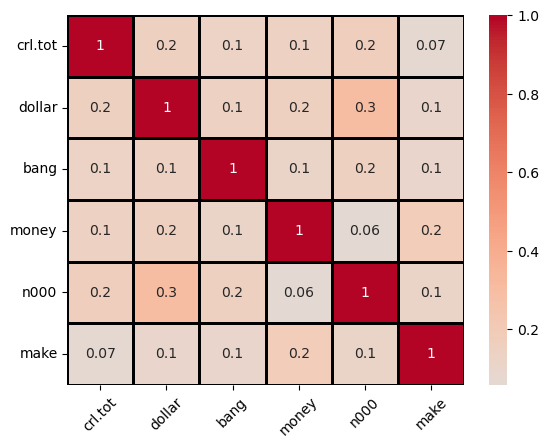

In [20]:
# Correlation Matrix
sns.heatmap(df.corr(),
            cmap = 'coolwarm',
            fmt = '.1g',
            center = 0,
            annot = True,
            linewidth = 1,
            linecolor = 'black')
plt.xticks(rotation = 45)
plt.yticks(rotation = 0)

## Logistic Regression Prep

In [22]:
df['yesno'] = np.where(df['yesno'] == 'y', 1, 0)
df.head()

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.00,0.778,0.00,0.00,0.00,1
1,1028,0.18,0.372,0.43,0.43,0.21,1
3,191,0.00,0.137,0.00,0.00,0.00,1
4,191,0.00,0.135,0.00,0.00,0.00,1
5,54,0.00,0.000,0.00,0.00,0.00,1


In [36]:
# perpare x & y
X = df.iloc[:,:-1]
y = df.yesno
X = sm.add_constant(X)
X.head(2)

,const,crl.tot,dollar,bang,money,n000,make
0,1.0,278,0.00,0.778,0.00,0.00,0.00
1,1.0,1028,0.18,0.372,0.43,0.43,0.21


## Training & Test Sets To Assess Accuracy

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 1502)

## Logistic Regression Results

In [41]:
# Logistic Regression
model = sm.Logit(y_train, X_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.386779
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  yesno   No. Observations:                 3545
Model:                          Logit   Df Residuals:                     3538
Method:                           MLE   Df Model:                            6
Date:                Sat, 05 Aug 2023   Pseudo R-squ.:                  0.4210
Time:                        19:13:48   Log-Likelihood:                -1371.1
converged:                       True   LL-Null:                       -2368.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1801      0.074    -29.532      0.000      -2.325      -2.035
crl.tot        0.0017      0.

In [54]:
# create function
def logistic_reader(coefficient):
    probability = round((np.exp(coefficient) - 1) * 100, 2)
    if probability > 0:
        print('The likelyhood increases by ', probability, '%')
    elif probability == 0:
        print('No impact')
    else:
        print('The likelyhood decreases by ', probability, '%')

In [89]:
# apply function
logistic_reader(0.0017)

The likelyhood increases by  0.17 %


## Accuracy Assement

In [90]:
# predictions
# X_test & y_test are not comparable because one is probability, while the other is an event

# solution: convert probabilities into an event  (1 if > 0.5, 0 if <= 0.5)

# 0.5 threshold maximizes accuracy, but is left up to the user
predictions = model.predict(X_test)
predictions = np.where(predictions > 0.5, 1, 0)
predictions[:5]

array([1, 0, 0, 0, 0])

### Checking if Unbalanced

In [91]:
# 35/65 split (35% are 1's, 65% are 0's)
# This is in the limit of being a balanced dataset.
# Anything under 30% is an unbalanced dataset.
y_test.mean()

0.35400225479143177

### Confusion Matrix

In [92]:
print(confusion_matrix(y_test, predictions))
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

[[524  49]
 [102 212]]


### KPI's

In [104]:
# Accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)
print('Accuracy:', round(accuracy * 100, 1), '%')

# F1-Score
f1 = 2 * tp / (2 * tp + fp + fn)
print('F-1 Score:', round(f1 * 100, 1), '%')

# True Negative Rate (specificity)
# This dataset has a higher share of "n's", and so we can expect the Specificity to have a higher score.
tnr = tn / (tn + fp)
print('True Negative Rate:', round(tnr * 100, 1), '%')

# True Positive Rate (sensitivity)
tpr = tp / (tp + fn)
print('True Positive Rate:', round(tpr * 100, 1), '%')

Accuracy: 83.0 %
F-1 Score: 73.7 %
True Negative Rate: 91.4 %
True Positive Rate: 67.5 %


### Classification Report

In [107]:
# Classification
# y_test == actual values; predictions == predicted values
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       573
           1       0.81      0.68      0.74       314

    accuracy                           0.83       887
   macro avg       0.82      0.79      0.81       887
weighted avg       0.83      0.83      0.83       887

